In [1]:
#Import relevant libraries
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
#from sklearn import metrics
# plt.style.use('ggplot')
# pd.set_option('display.max_columns', 200)
from scipy import stats
import os


In [2]:


benin = pd.read_csv('../data/benin-malanville_clean.csv')
sierra_leone = pd.read_csv('../data/sierraleone-bumbuna_clean.csv')
togo =pd.read_csv('../data/togo-bumbuna_clean.csv')

benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

df_all = pd.concat([benin, sierra_leone, togo], ignore_index=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_8080\3441982028.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')


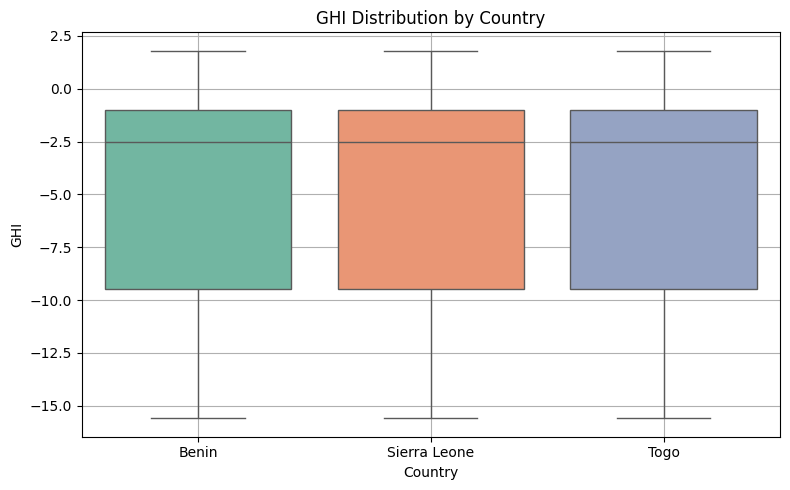

C:\Users\HP\AppData\Local\Temp\ipykernel_8080\3441982028.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')


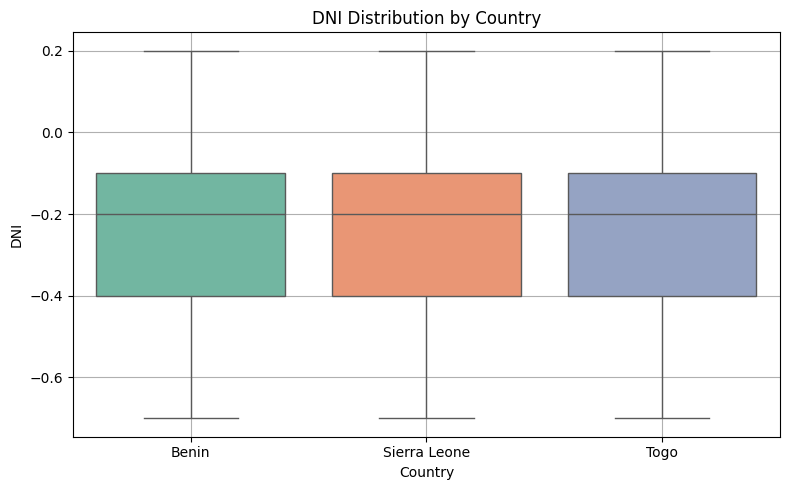

C:\Users\HP\AppData\Local\Temp\ipykernel_8080\3441982028.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')


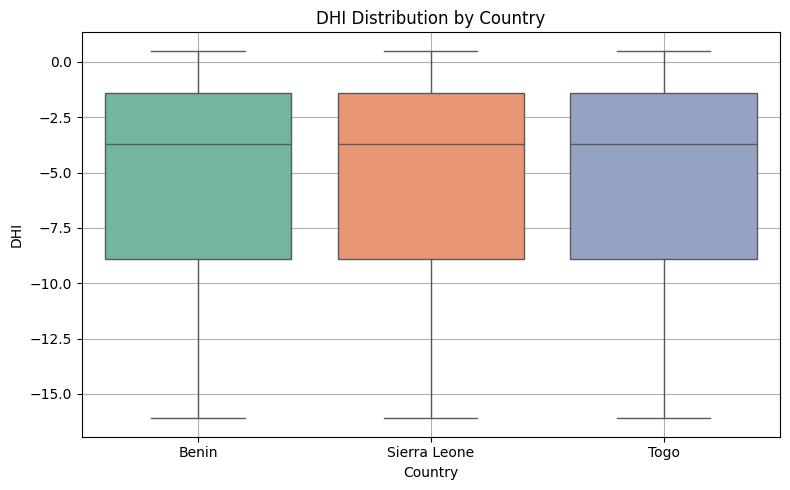

In [3]:


metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')
    plt.title(f'{metric} Distribution by Country')
    plt.ylabel(metric)
    plt.xlabel("Country")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [4]:
summary_stats = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary_stats


GHI               DNI                DHI             
              mean median  std  mean median   std  mean median   std
Country                                                             
Benin        -4.86   -2.5  4.3 -0.25   -0.2  0.16 -5.09   -3.7  4.01
Sierra Leone -4.86   -2.5  4.3 -0.25   -0.2  0.16 -5.09   -3.7  4.01
Togo         -4.86   -2.5  4.3 -0.25   -0.2  0.16 -5.09   -3.7  4.01

In [5]:
from scipy.stats import f_oneway, kruskal

# Extract GHI values for each country
ghi_benin = benin['GHI']
ghi_sierra_leone = sierra_leone['GHI']
ghi_togo = togo['GHI']

# Use Kruskal–Wallis (robust to non-normality)
h_stat, p_val = kruskal(ghi_benin, ghi_sierra_leone, ghi_togo)

print(f'Kruskal–Wallis test on GHI:\nH-statistic = {h_stat:.2f}, p-value = {p_val:.4f}')


Kruskal–Wallis test on GHI:
H-statistic = 0.00, p-value = 1.0000


C:\Users\HP\AppData\Local\Temp\ipykernel_8080\2455051859.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette='viridis')


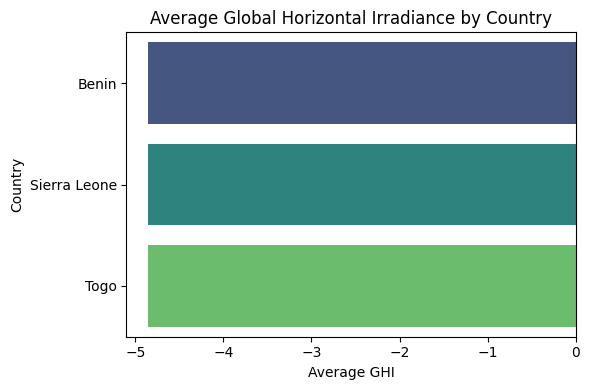

In [6]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette='viridis')
plt.xlabel('Average GHI')
plt.title('Average Global Horizontal Irradiance by Country')
plt.tight_layout()
plt.show()
